<a href="https://colab.research.google.com/github/malihaaaaa/CSE303/blob/main/ProjectCSE303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.91      0.82      0.86       111
           2       0.95      0.96      0.96       294
           3       0.84      0.88      0.86       186

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.95      0.94      0.94      1000


Regression Model Evaluation:
Mean Squared Error: 20.99
R-squared: 0.96


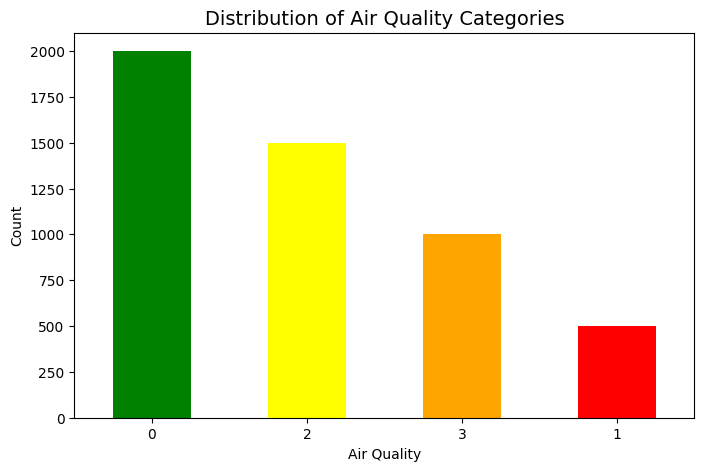

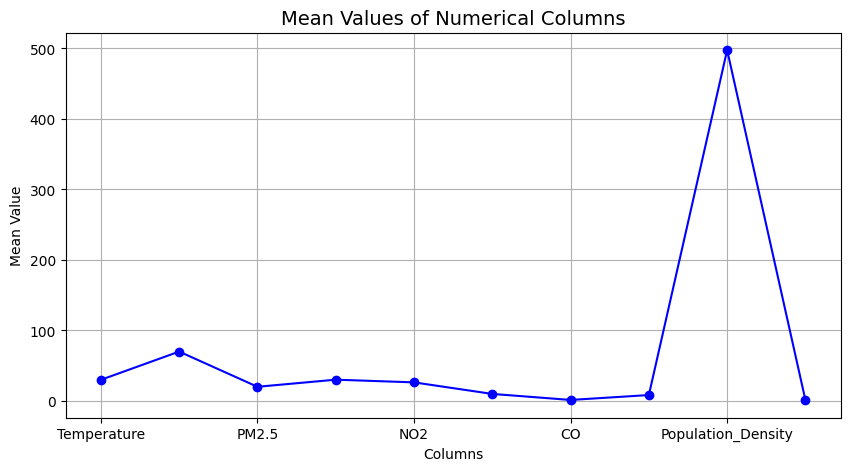

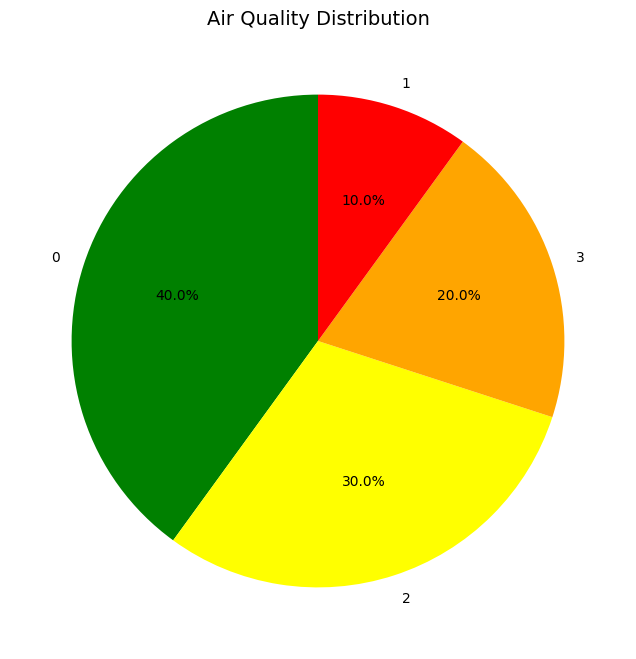

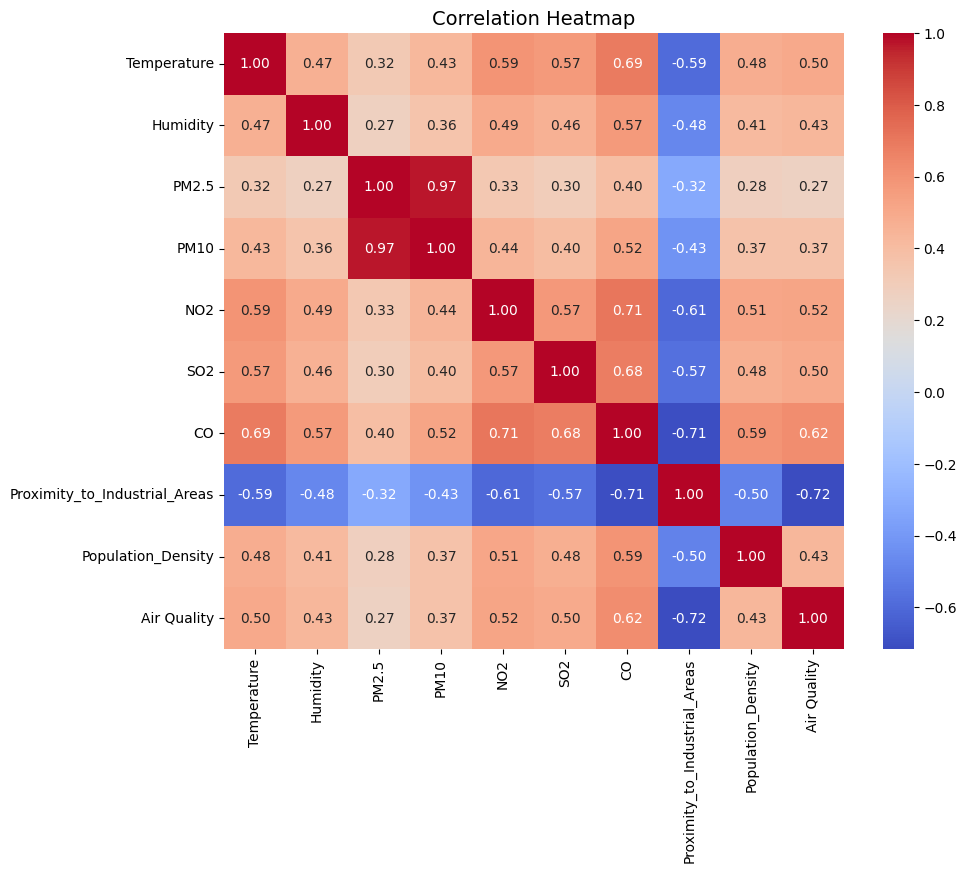

,mean,median,std,var
Temperature,30.029020,29.00,6.720661,45.167289
Humidity,70.056120,69.80,15.863577,251.653065
PM2.5,20.142140,12.00,24.554546,602.925723
PM10,30.218360,21.70,27.349199,747.978707
NO2,26.412100,25.30,8.895356,79.127365
SO2,10.014820,8.00,6.750303,45.566596
CO,1.500354,1.41,0.546027,0.298145
Proximity_to_Industrial_Areas,8.425400,7.90,3.610944,13.038915
Population_Density,497.423800,494.00,152.754084,23333.810156
Air Quality,1.300000,1.50,1.187553,1.410282


from matplotlib import pyplot as plt
_df_22['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['median'].plot(kind='hist', bins=20, title='median')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['var'].plot(kind='hist', bins=20, title='var')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='mean', y='median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='median', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='std', y='var', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['median'].plot(kind='line', figsize=(8, 4), title='median')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['var'].plot(kind='line', figsize=(8, 4), title='var')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score

# Load the dataset
file_path = '/content/updated_pollution_dataset.csv'
data = pd.read_csv('/content/updated_pollution_dataset.csv')

# Encode the categorical column 'Air Quality' for classification
label_encoder = LabelEncoder()
data['Air Quality'] = label_encoder.fit_transform(data['Air Quality'])

# Define features (X) and target (y) for classification
X_classification = data.drop(columns=['Air Quality'])
y_classification = data['Air Quality']

# Split the data into training and testing sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Standardize the features for SVM
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

# Train an SVM model for classification
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_clf, y_train_clf)

# Predict and evaluate the SVM model
y_pred_clf = svm_model.predict(X_test_clf)
print("Classification Report (SVM):")
print(classification_report(y_test_clf, y_pred_clf))

# Define features (X) and target (y) for regression
X_regression = data.drop(columns=['PM2.5'])  # Assuming PM2.5 is the target for regression
y_regression = data['PM2.5']

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# Standardize the features for regression
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

# Train a Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train_reg, y_train_reg)

# Predict and evaluate the regression model
y_pred_reg = regression_model.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\nRegression Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


# Step 1: Calculate mean, median, standard deviation, and variance for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
statistics = data[numerical_columns].agg(['mean', 'median', 'std', 'var'])

# Check the distribution of the 'Air Quality' column to assess balance
air_quality_distribution = data['Air Quality'].value_counts(normalize=True) * 100  # Convert to percentages
air_quality_counts = data['Air Quality'].value_counts()  # Absolute counts

air_quality_counts, air_quality_distribution




# Calculate air quality counts
air_quality_counts = data['Air Quality'].value_counts()

# Step 2: Plot a bar chart (Air Quality distribution)
plt.figure(figsize=(8, 5))
air_quality_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title("Distribution of Air Quality Categories", fontsize=14)
plt.xlabel("Air Quality")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()




# Step 3: Plot a line graph (Mean of numerical columns)
plt.figure(figsize=(10, 5))
statistics.loc['mean'].plot(kind='line', marker='o', color='blue')
plt.title("Mean Values of Numerical Columns", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()

# Step 4: Plot a pie chart (Air Quality distribution percentages)
plt.figure(figsize=(8, 8))
air_quality_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'orange', 'red'])
plt.title("Air Quality Distribution", fontsize=14)
plt.ylabel("")  # Hide y-label for aesthetics
plt.show()

# Step 5: Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# Display statistics (mean, median, std dev, variance)
statistics.T


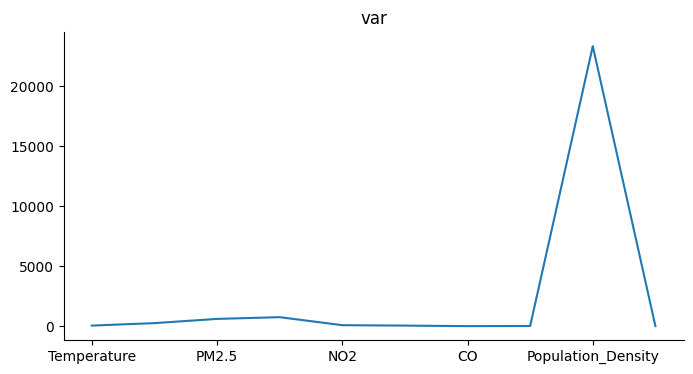

In [ ]:
from matplotlib import pyplot as plt
_df_32['var'].plot(kind='line', figsize=(8, 4), title='var')
plt.gca().spines[['top', 'right']].set_visible(False)

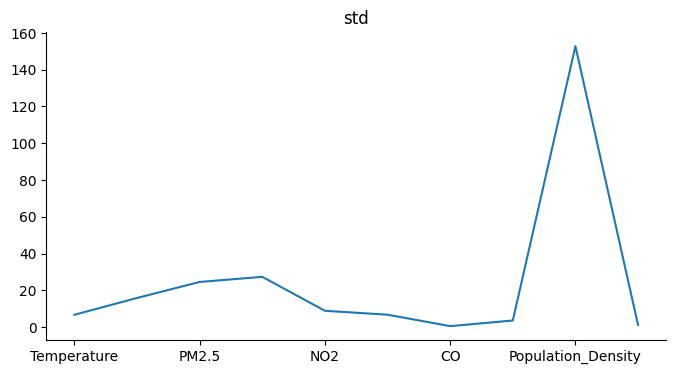

In [ ]:
from matplotlib import pyplot as plt
_df_31['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

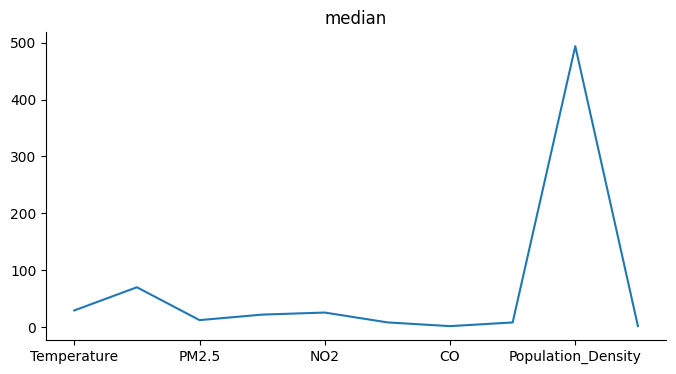

In [ ]:
from matplotlib import pyplot as plt
_df_30['median'].plot(kind='line', figsize=(8, 4), title='median')
plt.gca().spines[['top', 'right']].set_visible(False)

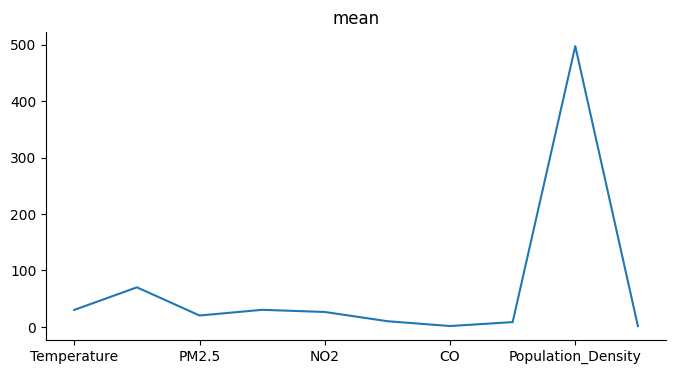

In [ ]:
from matplotlib import pyplot as plt
_df_29['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

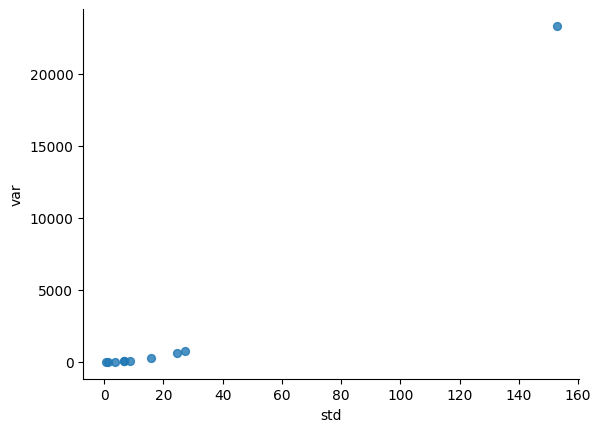

In [ ]:
from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='std', y='var', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

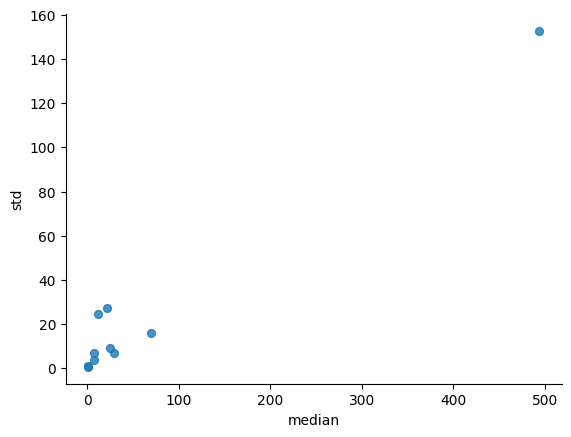

In [ ]:
from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='median', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

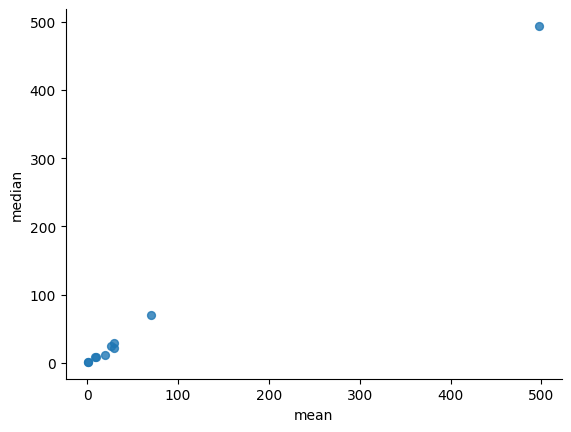

In [ ]:
from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='mean', y='median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

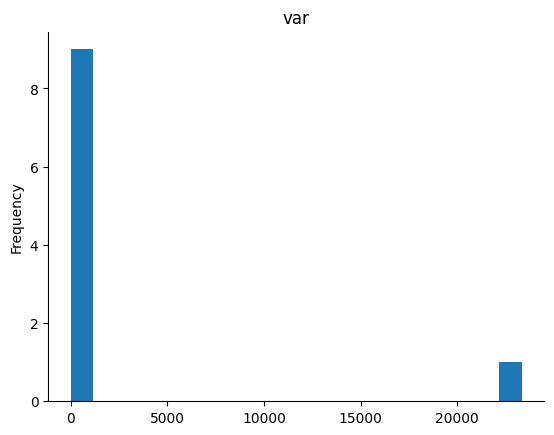

In [ ]:
from matplotlib import pyplot as plt
_df_25['var'].plot(kind='hist', bins=20, title='var')
plt.gca().spines[['top', 'right',]].set_visible(False)

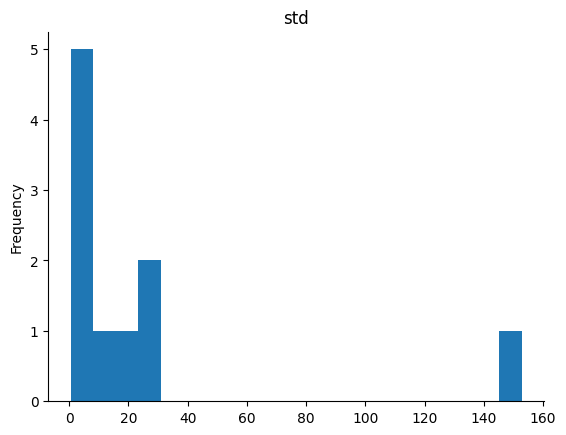

In [ ]:
from matplotlib import pyplot as plt
_df_24['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

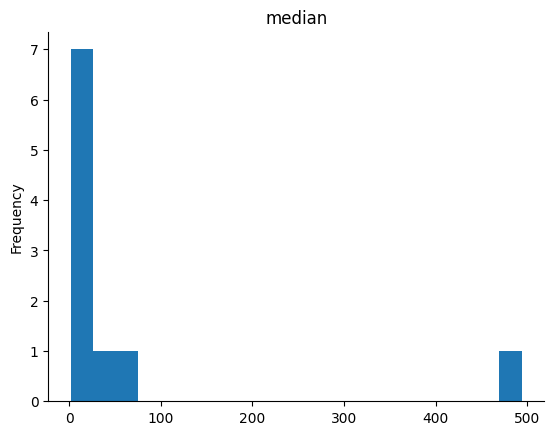

In [ ]:
from matplotlib import pyplot as plt
_df_23['median'].plot(kind='hist', bins=20, title='median')
plt.gca().spines[['top', 'right',]].set_visible(False)

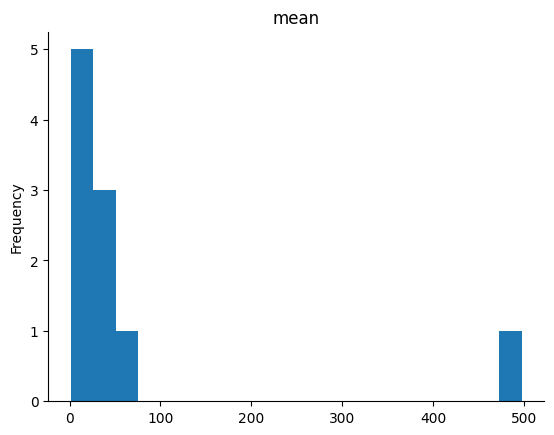

In [ ]:
from matplotlib import pyplot as plt
_df_11['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)